In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [2]:
D1_0 = pd.read_csv('Dataset1_ProjetModelisation.csv', sep = ';', decimal=",")
D2_0 = pd.read_csv('Dataset2_ProjetModelisation.csv', sep = ';')
D1 = pd.read_csv('Dataset1_ProjetModelisation.csv', sep = ';')
D2 = pd.read_csv('Dataset2_ProjetModelisation.csv', sep = ';')

In [3]:
D1.columns =D1.columns.str.replace('cespece', 'CodeEspece')
D1.columns =D1.columns.str.replace('NumStation', 'Site')
D2.columns =D2.columns.str.replace('Nombre points', 'Nb points Total')

In [4]:
D1.columns = D1.columns.str.replace('cespece','CodeEspece')
D1.columns = D1.columns.str.replace('NumStation','Site')
D2.columns = D2.columns.str.replace('Nombre points','Nb points Total')

In [5]:
D2 = D2.loc[:,['Secteur','Site','Localisation','Month','Year','CodeEspece','TailleIndividu (mm)','Nb points Total']]
D1 = D1.loc[:,['Secteur','Site','Localisation','Month','Year','CodeEspece','taille (cm)','Nb points Total']]

In [6]:
D1['taille (cm)'] = D1['taille (cm)'].str.replace(',','.')

In [7]:
D1['taille (cm)'] = D1['taille (cm)'].astype(float,errors="raise")

In [8]:
D1['taille (cm)'] = D1['taille (cm)'] *10

In [9]:
D1['taille (cm)'] = D1['taille (cm)'].astype(int,errors="raise")

In [10]:
D1.rename(columns={"taille (cm)": 'TailleIndividu (mm)'}, inplace=True)

In [122]:
D= pd.concat([D1,D2])

In [124]:
D

,Secteur,Site,Localisation,Month,Year,CodeEspece,TailleIndividu (mm),Nb points Total
0,1,1,Annexe secondaire,11,2004,PES,67,25
1,1,1,Annexe secondaire,11,2004,EPI,50,25
2,1,1,Annexe secondaire,11,2004,TAN,34,25
3,1,1,Annexe secondaire,11,2004,TAN,44,25
4,1,1,Annexe secondaire,11,2004,TAN,33,25
...,...,...,...,...,...,...,...,...
27586,2,19,Chenal principal,10,2022,PSR,60,100
27587,2,19,Chenal principal,10,2022,PES,42,100
27588,2,19,Chenal principal,10,2022,PES,33,100
27589,2,19,Chenal principal,10,2022,PES,38,100


In [13]:
# Les deux jeux de données ont été concaténés 

In [126]:
D['nb_poissons']= 1

In [15]:
#On cherche à standardiser 

In [16]:
# Nombre de point de pêche par site par année
D_pivot = D.pivot_table(index=['Site','Secteur'], columns='Year', values='Nb points Total', aggfunc='mean')
D_pivot

,Year,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Site,Secteur,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0
5,1,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0


In [17]:
# Normalisation du nombre de poisson par point de pêche
def norm(df):
    df_pts_peche_pivot = df.pivot_table(index=['Site', 'Secteur'], columns='Year', values='Nb points Total', aggfunc='mean')
    df_nb_poisson = df.reset_index()
    df_norm_pivot = pd.DataFrame()
    for esp in df_nb_poisson["CodeEspece"].unique():
        df_nb_poisson_tmp = df_nb_poisson[df_nb_poisson["CodeEspece"]==esp]
        df_nb_poisson_pivot = df_nb_poisson_tmp.groupby(['CodeEspece', 'Site'])['Year'].value_counts().unstack(fill_value=0)
        df_norm_pivot_tmp = (((df_nb_poisson_pivot/df_pts_peche_pivot).fillna(0)/df_pts_peche_pivot)*df_pts_peche_pivot).round(2)
        df_norm_pivot_tmp["cespece"] = esp
        df_norm_pivot = pd.concat([df_norm_pivot, df_norm_pivot_tmp])
    df_norm_pivot.reset_index(inplace=True)
    df_norm_pivot = df_norm_pivot.rename_axis(None, axis=1)
    df_norm_pivot["CodeEspece"] = df_norm_pivot["cespece"]
    df_norm_pivot.drop(["cespece"], axis=1, inplace=True)
    return df_norm_pivot

df_norm_pivot = norm(D)
df_norm_pivot

,Site,Secteur,CodeEspece,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,1,PES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.16,0.00,0.00,0.04,0.00,0.00,0.00
1,2,1,PES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,PES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.08,0.04,1.88,3.88,0.56,6.36,1.44,5.76,0.08,0.48
3,4,1,PES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.08,0.00,0.00,0.04
4,5,1,PES,0.0,0.24,0.12,0.28,0.2,0.24,0.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,15,2,CMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
794,16,2,CMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
795,17,1,CMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.00
796,18,1,CMI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00


In [18]:
df_norm_sum = df_norm_pivot.iloc[:, 2:].groupby(["CodeEspece"]).sum()
df_norm_sum = pd.DataFrame(df_norm_sum.sum(axis=1).sort_values(ascending=False), columns=["nb_poissons"])
df_norm_sum.reset_index(inplace=True)
df_norm_sum.set_index('CodeEspece')

,nb_poissons
CodeEspece,
CHE,511.96
SPI,414.64
VAI,282.94
BAF,271.15
GOU,252.65
ABL,249.80
BOU,181.17
PSR,149.98
GAR,135.21


<Axes: xlabel='nb_poissons', ylabel='CodeEspece'>

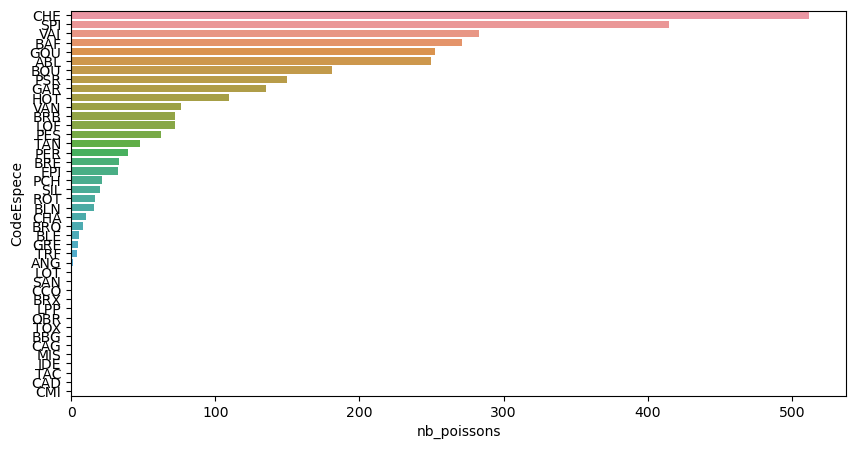

In [19]:
# Visualisation
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.barplot(x="nb_poissons", y="CodeEspece", data=df_norm_sum)

In [20]:
tot = df_norm_sum['nb_poissons'].sum()
pourcentage_neglige = tot * 0.85
pourcentage_neglige

2640.4230000000002

In [21]:
#On décide d'enlever les espèces les moins représentées. Pour cela on garde seulement celles qui représentent 85% des espèces pêchées.

In [22]:
print(df_norm_sum['nb_poissons'].cumsum(axis=0))

0      511.96
1      926.60
2     1209.54
3     1480.69
4     1733.34
5     1983.14
6     2164.31
7     2314.29
8     2449.50
9     2559.03
10    2634.89
11    2707.06
12    2778.95
13    2841.31
14    2888.81
15    2928.55
16    2962.06
17    2994.36
18    3015.90
19    3035.94
20    3052.44
21    3068.52
22    3078.76
23    3087.27
24    3092.41
25    3097.13
26    3101.07
27    3102.14
28    3102.88
29    3103.54
30    3104.16
31    3104.72
32    3105.19
33    3105.59
34    3105.87
35    3106.02
36    3106.14
37    3106.26
38    3106.31
39    3106.35
40    3106.37
41    3106.38
Name: nb_poissons, dtype: float64


In [23]:
#On garde alors seulement les dix espèces suivantes : HOT, GAR, PSR, BOU, ABL,GOU, BAF, VAI, SPI et CHE

In [52]:
#D1 = D[D["CodeEspece"].isin(D.iloc[0:10,0].to_list())]
D["CodeEspece"].isin(D.iloc[0:10,0].to_list())

0        False
1        False
2        False
3        False
4        False
         ...  
27586    False
27587    False
27588    False
27589    False
27590    False
Name: CodeEspece, Length: 117632, dtype: bool

In [128]:
# Filtre des 10 espèces les plus observées dans le jeu de données D et df_norm_pivot_reduit
D[(D['CodeEspece'] == 'CHE') | (D['CodeEspece'] == 'SPI')| (D['CodeEspece'] == 'ABL')| (D['CodeEspece'] == 'SPI')| (D['CodeEspece'] == 'GOU')| (D['CodeEspece'] == 'BOU')| (D['CodeEspece'] == 'HOT')| (D['CodeEspece'] == 'VAI')| (D['CodeEspece'] == 'BAF')| (D['CodeEspece'] == 'PSR')]
df_norm_pivot_reduit = df_norm_pivot[df_norm_pivot["CodeEspece"].isin(df_norm_sum.iloc[0:10,0].to_list())]
df_norm_pivot_reduit

,Site,Secteur,CodeEspece,1982,1983,1984,1985,1986,1987,1988,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
57,1,1,CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.16,0.52,1.24,1.20,0.84,1.80,2.04,1.44,0.16,1.40
58,2,1,CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,3,1,CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.52,0.84,5.48,7.24,0.88,4.44,0.28,11.04,0.40,1.20
60,4,1,CHE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.92,1.28,1.56,0.96,0.88,1.92,3.68,0.44,0.32,3.32
61,5,1,CHE,0.28,0.88,1.64,6.0,2.4,2.52,1.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,15,2,PSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.20,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
452,16,2,PSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.04,0.04,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
453,17,1,PSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.00,NaN,0.00,NaN,0.00,NaN,0.02,NaN,0.00
454,18,1,PSR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.03,0.03,0.05,0.09,0.03,0.00,0.03,0.01,0.01,0.23


In [26]:
#Initialisation tableau ACP
tableau_ACP = pd.DataFrame(data=None, index=["Période1_Secteur1","Période2_Secteur1","Période3_Secteur1","Période2_Secteur2", "Période3_Secteur2"], columns=['CHE', 'GAR', 'ABL', 'SPI', 'GOU', 'BOU', 'HOT', 'VAI', 'BAF',
       'PSR']
      , dtype=None, copy=None)

In [27]:
tableau_ACP

,CHE,GAR,ABL,SPI,GOU,BOU,HOT,VAI,BAF,PSR
Période1_Secteur1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Période2_Secteur1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Période3_Secteur1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Période2_Secteur2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Période3_Secteur2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Création tableau final pour l'ACP : nombre (standardisé) de poissons pêchés par période et par secteur regroupé par espèces

In [29]:
i = 0
for esp in df_norm_pivot_reduit["CodeEspece"].unique():
    D_test = df_norm_pivot_reduit[df_norm_pivot_reduit["CodeEspece"] == esp]
    D_test = D_test.transpose()
    D_test2 = D_test.drop(["CodeEspece","Site"])
    D_test2 = D_test2.transpose()
    D_test2 = D_test2.reset_index().groupby("Secteur").mean()
    #P1 = 1982 - 1997
    #P2 = 2004 - 2012
    #P3 = 2013 - 2022
    D_stand_P1 = D_test2.iloc[:,1:17].mean(axis=1)
    D_stand_P2 = D_test2.iloc[:,17:26].mean(axis=1)
    D_stand_P3 = D_test2.iloc[:,26:].mean(axis=1)
    tableau_ACP.iloc[0][i] = D_stand_P1.iloc[0]
    tableau_ACP.iloc[1][i] = D_stand_P2.iloc[0]
    tableau_ACP.iloc[2][i] = D_stand_P3.iloc[0]
    tableau_ACP.iloc[3][i] = D_stand_P2.iloc[1]
    tableau_ACP.iloc[4][i] = D_stand_P3.iloc[1]
    i = i + 1
tableau_ACP 

C:\Users\Couzidakis\AppData\Local\Temp\ipykernel_116\3595483649.py:14: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  tableau_ACP.iloc[0][i] = D_stand_P1.iloc[0]
C:\Users\Couzidakis\AppData\Local\Temp\ipykernel_116\3595483649.py:15: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  tableau_ACP.iloc[1][i] = D_stand_P2.iloc[0]
C:\Users\Couzidakis\AppData\Local\Temp\ipykernel_116\3595483649.py:16: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.ilo

,CHE,GAR,ABL,SPI,GOU,BOU,HOT,VAI,BAF,PSR
Période1_Secteur1,1.45125,1.06375,1.1525,0.410625,0.8775,0.08125,0.7675,0.055,0.3175,0.000625
Période2_Secteur1,1.432747,0.462799,0.740636,0.184164,0.682531,0.682843,0.146627,0.146083,0.360204,0.095
Période3_Secteur1,2.396764,0.224556,0.899069,0.224083,1.203778,1.28525,0.088583,0.140889,0.736806,1.602014
Période2_Secteur2,1.151,0.212667,0.474667,4.367667,0.263333,0.086,1.076333,4.796,1.952667,0.042
Période3_Secteur2,1.6548,0.1458,0.6252,4.9042,0.8532,0.2716,0.304,2.6946,2.0606,0.0738


In [30]:
tableau_ACP_trans = tableau_ACP.transpose()

In [88]:
data_num = tableau_ACP.transpose()
colonnes = data_num.columns
data_num = pd.DataFrame(data = scale(data_num, axis=0), columns = colonnes)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_num)

In [90]:
pca = PCA()
pca.fit(data_num)
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(data_num.shape[1])],
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
display(eig)

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,3.083927,56.0,56.0
1,Dim2,1.463069,26.0,82.0
2,Dim3,0.818449,15.0,97.0
3,Dim4,0.116920,2.0,99.0
4,Dim5,0.073191,1.0,100.0


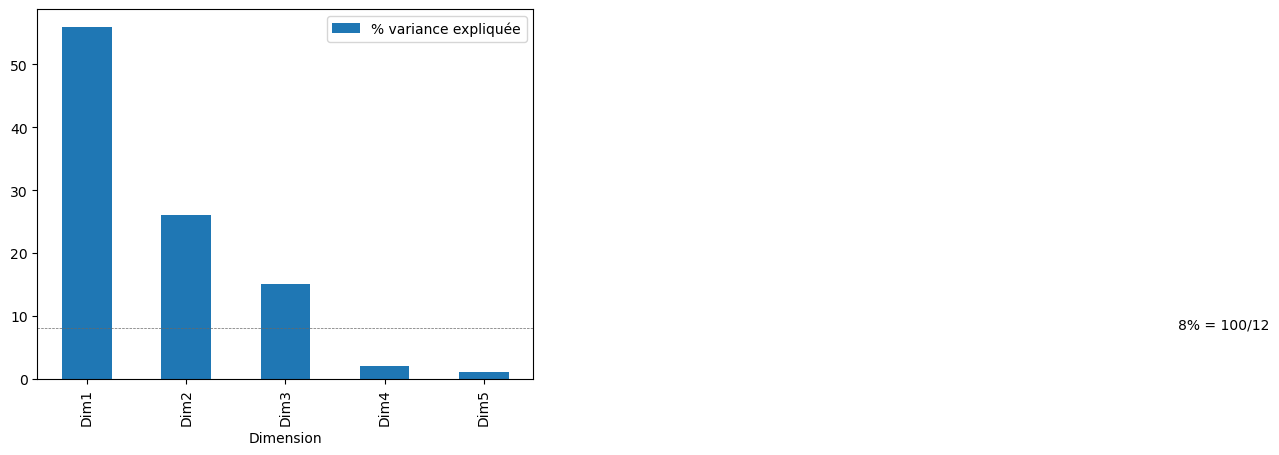

In [92]:
eig.plot.bar(x = "Dimension", y = "% variance expliquée") # permet un diagramme en barres
plt.text(11, 8, "8% = 100/12") # ajout de texte
plt.axhline(y = 8, linewidth = .5, color = "dimgray", linestyle = "--") # ligne 8 = 100 / 12 (nb dimensions)
plt.show()

                  id     COR_1     COR_2     COR_3
0  Période1_Secteur1 -0.649160  0.449063  0.598987
1  Période2_Secteur1 -0.802503  0.549582 -0.059140
2  Période3_Secteur1 -0.752813  0.226342 -0.599895
3  Période2_Secteur2  0.830089  0.516336 -0.041065
4  Période3_Secteur2  0.674046  0.703726 -0.112965


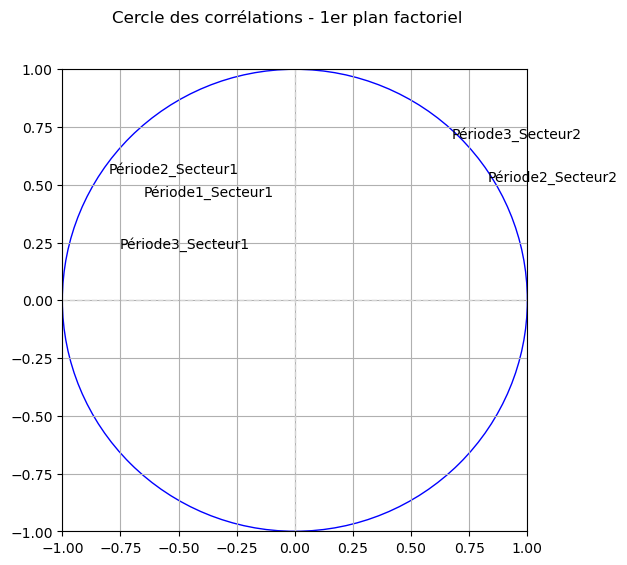

In [94]:
n = data_num.shape[0] 
p = data_num.shape[1] 
eigval = (n-1) / n * pca.explained_variance_ 
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': data_num.columns,
                         'COR_1': corvar[:,0],
                         'COR_2': corvar[:,1],
                         'COR_3': corvar[:,2],
                         })
print(coordvar)

# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations - 1er plan factoriel")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_2"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.grid(True)
plt.show()

                  id     COR_1     COR_2     COR_3
0  Période1_Secteur1 -0.649160  0.449063  0.598987
1  Période2_Secteur1 -0.802503  0.549582 -0.059140
2  Période3_Secteur1 -0.752813  0.226342 -0.599895
3  Période2_Secteur2  0.830089  0.516336 -0.041065
4  Période3_Secteur2  0.674046  0.703726 -0.112965


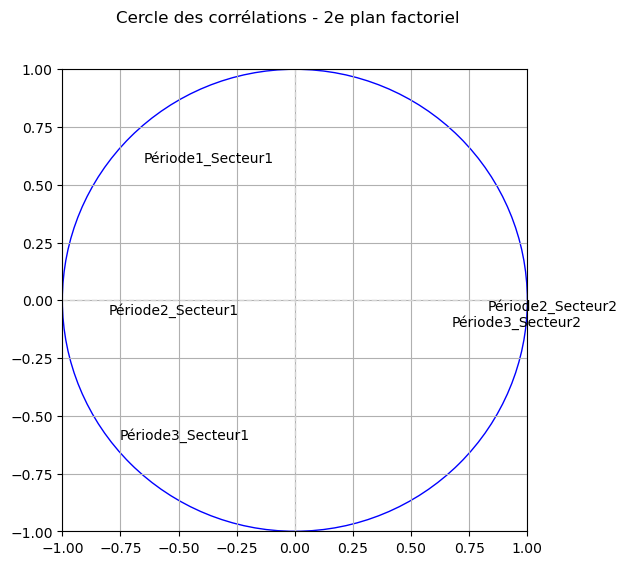

In [96]:
n = data_num.shape[0] 
p = data_num.shape[1] 
eigval = (n-1) / n * pca.explained_variance_ 
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': data_num.columns,
                         'COR_1': corvar[:,0],
                         'COR_2': corvar[:,1],
                         'COR_3': corvar[:,2],
                         })
print(coordvar)

# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations - 2e plan factoriel")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_1"][j],coordvar["COR_3"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.grid(True)
plt.show()

                  id     COR_1     COR_2     COR_3
0  Période1_Secteur1 -0.649160  0.449063  0.598987
1  Période2_Secteur1 -0.802503  0.549582 -0.059140
2  Période3_Secteur1 -0.752813  0.226342 -0.599895
3  Période2_Secteur2  0.830089  0.516336 -0.041065
4  Période3_Secteur2  0.674046  0.703726 -0.112965


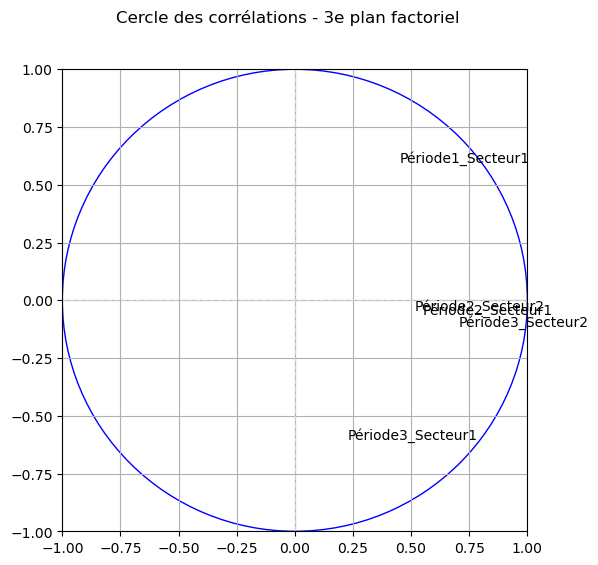

In [98]:
n = data_num.shape[0] 
p = data_num.shape[1] 
eigval = (n-1) / n * pca.explained_variance_ 
sqrt_eigval = np.sqrt(eigval) # racine carrée des valeurs propres
corvar = np.zeros((p,p)) # matrice vide pour avoir les coordonnées
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]
# on modifie pour avoir un dataframe
coordvar = pd.DataFrame({'id': data_num.columns,
                         'COR_1': corvar[:,0],
                         'COR_2': corvar[:,1],
                         'COR_3': corvar[:,2],
                         })
print(coordvar)

# Création d'une figure vide (avec des axes entre -1 et 1 + le titre)
fig, axes = plt.subplots(figsize = (6,6))
fig.suptitle("Cercle des corrélations - 3e plan factoriel")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
# Ajout des axes
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
# Ajout des noms des variables
for j in range(p):
    axes.text(coordvar["COR_2"][j],coordvar["COR_3"][j], coordvar["id"][j])
# Ajout du cercle
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.grid(True)
plt.show()

In [100]:
tabl_test = tableau_ACP
tabl_test

,CHE,GAR,ABL,SPI,GOU,BOU,HOT,VAI,BAF,PSR
Période1_Secteur1,1.45125,1.06375,1.1525,0.410625,0.8775,0.08125,0.7675,0.055,0.3175,0.000625
Période2_Secteur1,1.432747,0.462799,0.740636,0.184164,0.682531,0.682843,0.146627,0.146083,0.360204,0.095
Période3_Secteur1,2.396764,0.224556,0.899069,0.224083,1.203778,1.28525,0.088583,0.140889,0.736806,1.602014
Période2_Secteur2,1.151,0.212667,0.474667,4.367667,0.263333,0.086,1.076333,4.796,1.952667,0.042
Période3_Secteur2,1.6548,0.1458,0.6252,4.9042,0.8532,0.2716,0.304,2.6946,2.0606,0.0738


In [102]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tabl_test)

# Application de l'ACP
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Extraction des charges
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)*3/4

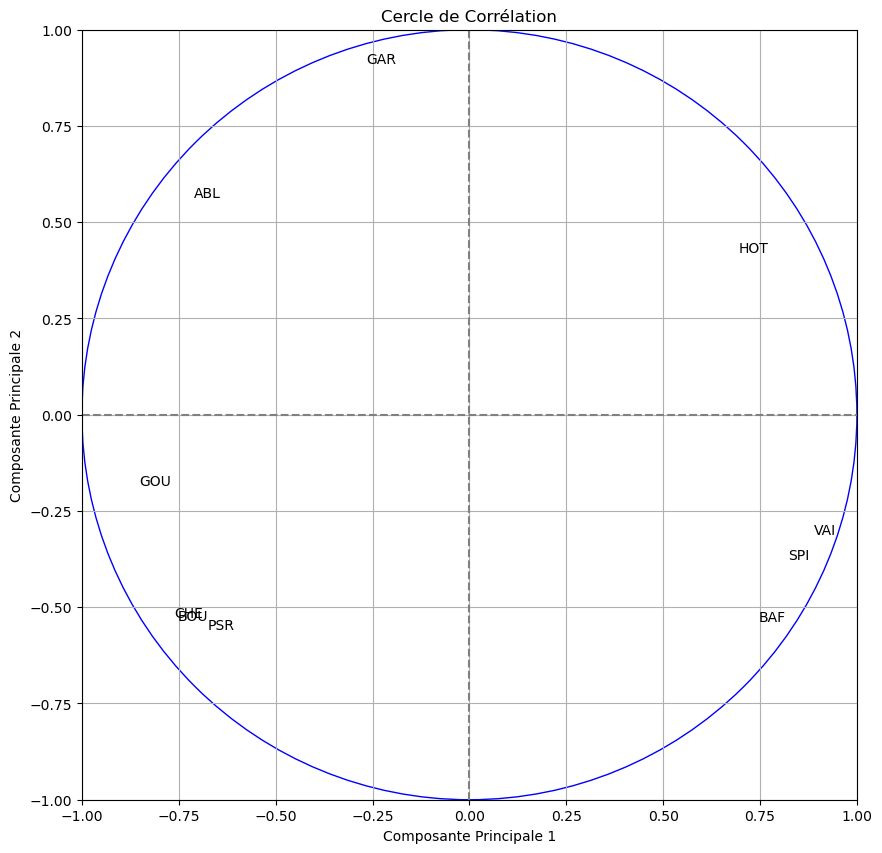

In [104]:
# Fonction pour dessiner un cercle
def draw_circle(ax, center, radius):
    circle = plt.Circle(center, radius, color='blue', fill=False)
    ax.add_artist(circle)

# Tracer le cercle de corrélation
fig, ax = plt.subplots(figsize=(10, 10))

# Tracer les flèches (vecteurs) des charges
for i, var in enumerate(tabl_test.columns):
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='black')

# Définir les limites du graphique
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Tracer les axes
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# Dessiner le cercle de corrélation
draw_circle(ax, (0, 0), 1)

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Cercle de Corrélation')
plt.grid()
plt.show()

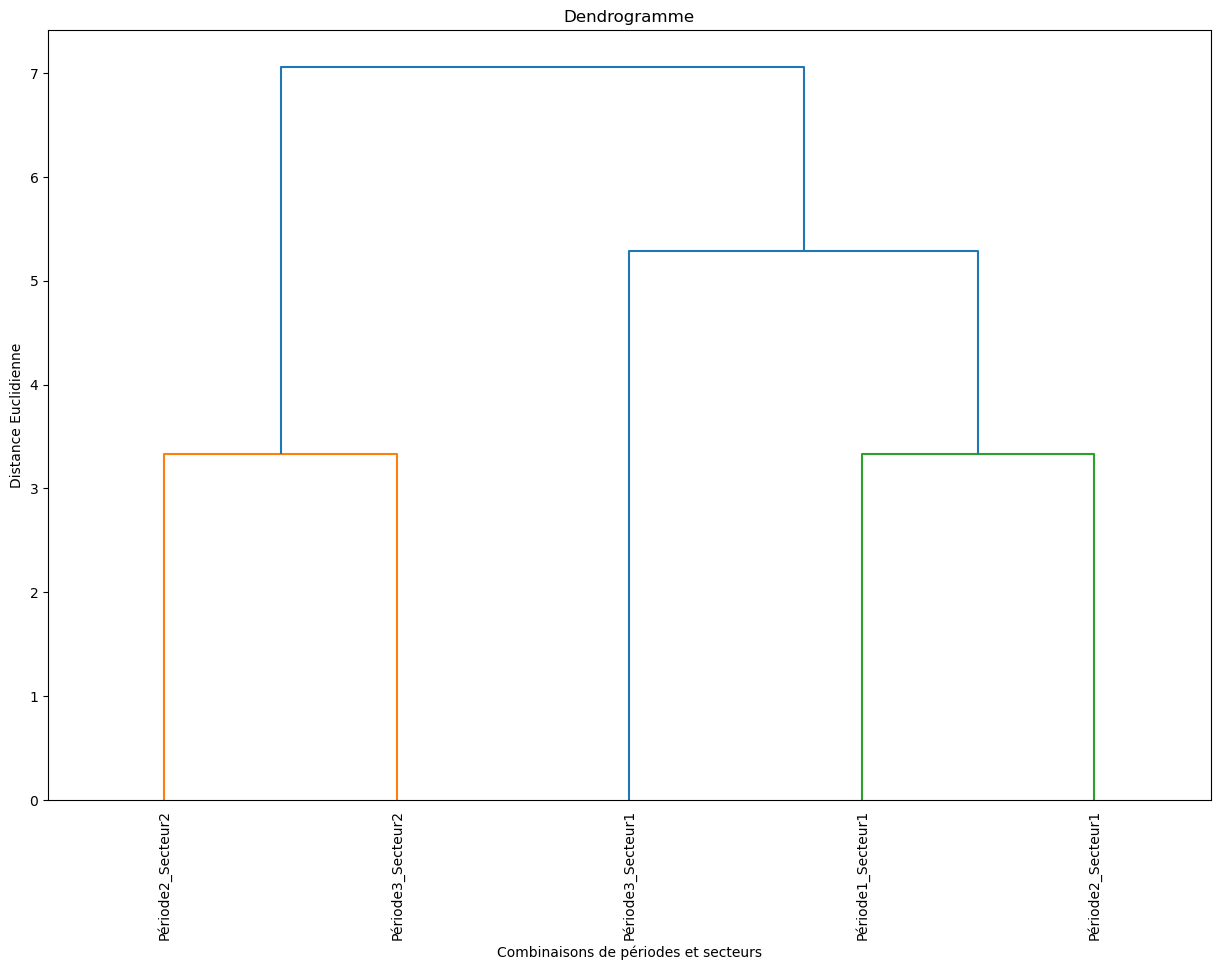

In [110]:
index = ["Période1_Secteur1", "Période2_Secteur1", "Période3_Secteur1", "Période2_Secteur2", "Période3_Secteur2"]
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(tabl_test)

# Calcul de la matrice des distances
distance_matrix = pdist(scaled_data, metric='euclidean')

# Clustering hiérarchique
Z = linkage(distance_matrix, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogramme')
plt.xlabel('Combinaisons de périodes et secteurs')
plt.ylabel('Distance Euclidienne')
plt.show()

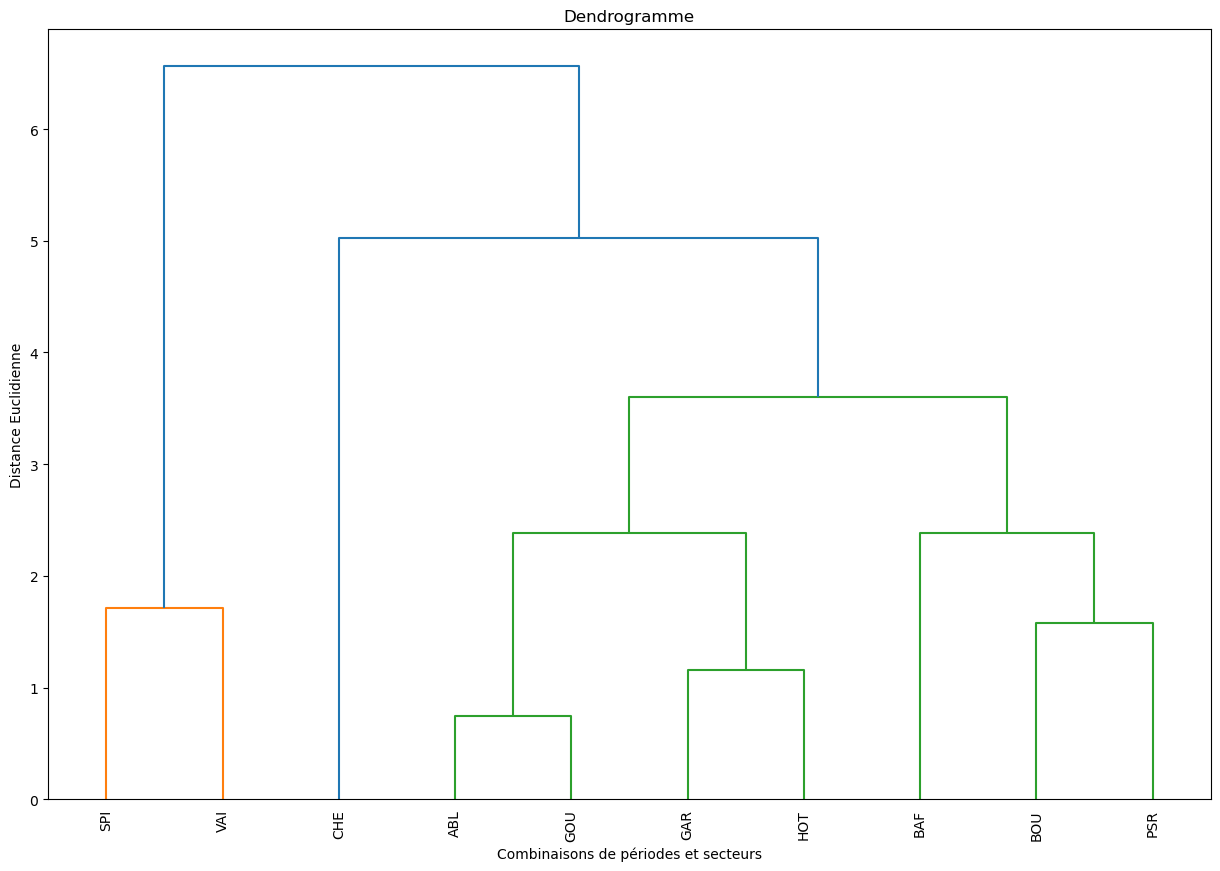

In [108]:
index = tabl_test.columns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist

df = tabl_test.transpose()

# Standardisation des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Calcul de la matrice des distances
distance_matrix = pdist(scaled_data, metric='euclidean')

# Clustering hiérarchique
Z = linkage(distance_matrix, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=index, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogramme')
plt.xlabel('Combinaisons de périodes et secteurs')
plt.ylabel('Distance Euclidienne')
plt.show()

In [ ]:
# Nous allons à présent nous intéresser à l'abondance de trois espèces les plus représentées dans la base de données et qui d'après 
# les dendrogramme et cercles de corrélation ne sont pas liées entre elles. 

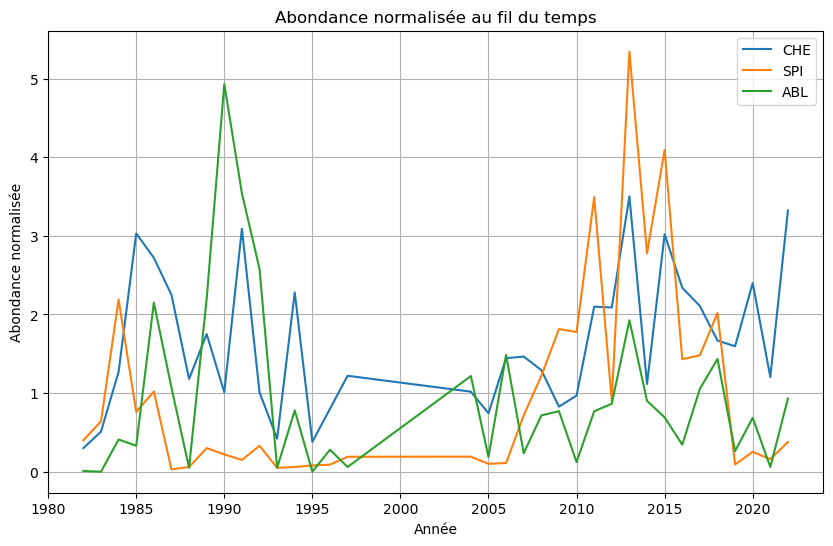

In [206]:
data = {
    "Year": [],
    "CHE": [],
    "SPI": [],
    "ABL": []
}
df_norm_pivot_reduit_CHE = df_norm_pivot_reduit[df_norm_pivot_reduit['CodeEspece'] == 'CHE']
CHE = df_norm_pivot_reduit_CHE.groupby('CodeEspece').mean()
df_norm_pivot_reduit_SPI = df_norm_pivot_reduit[df_norm_pivot_reduit['CodeEspece'] == 'SPI']
SPI = df_norm_pivot_reduit_SPI.groupby('CodeEspece').mean()
df_norm_pivot_reduit_ABL = df_norm_pivot_reduit[df_norm_pivot_reduit['CodeEspece'] == 'ABL']
ABL = df_norm_pivot_reduit_ABL.groupby('CodeEspece').mean()
# Ajouter les données du tableau
data["Year"] = sorted(D['Year'].unique())  # années de 1982 à 2022
for i in data["Year"]:
    data["CHE"].append(CHE[i].iloc[0]) 
    data["SPI"].append(SPI[i].iloc[0]) 
    data["ABL"].append(ABL[i].iloc[0]) 

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Year"], df["CHE"], label="CHE")
plt.plot(df["Year"], df["SPI"], label="SPI")
plt.plot(df["Year"], df["ABL"], label="ABL")

plt.title("Abondance normalisée au fil du temps")
plt.xlabel("Année")
plt.ylabel("Abondance normalisée")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Nous pouvons observer trois évolutions différentes. Dans un premier temps, l'espèce CHE rencontre une évolution plutôt constante 
# Dans un deuxième temps, l'espèce ABL connais un grand pic de population en 1990 avant de se stabiliser
# Pour finir, l'espèce SPI rencontre un pic en 2014 après une période de très faible population. 

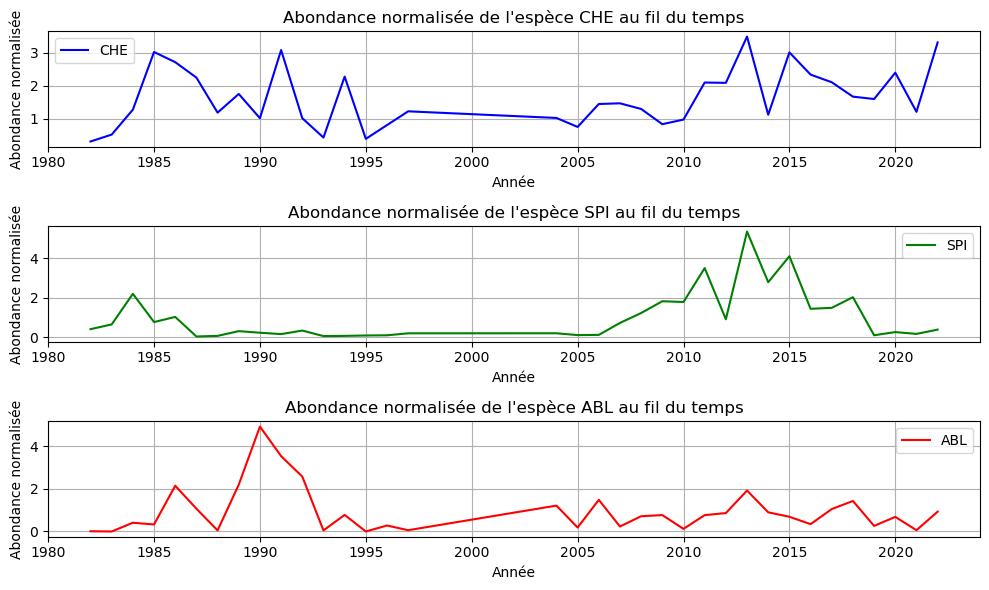

In [208]:
# Création des graphiques séparés
plt.figure(figsize=(10, 6))

# Graphique pour l'espèce CHE
plt.subplot(3, 1, 1)
plt.plot(df["Year"], df["CHE"], label="CHE", color="blue")
plt.title("Abondance normalisée de l'espèce CHE au fil du temps")
plt.xlabel("Année")
plt.ylabel("Abondance normalisée")
plt.legend()
plt.grid(True)

# Graphique pour l'espèce SPI
plt.subplot(3, 1, 2)
plt.plot(df["Year"], df["SPI"], label="SPI", color="green")
plt.title("Abondance normalisée de l'espèce SPI au fil du temps")
plt.xlabel("Année")
plt.ylabel("Abondance normalisée")
plt.legend()
plt.grid(True)

# Graphique pour l'espèce ABL
plt.subplot(3, 1, 3)
plt.plot(df["Year"], df["ABL"], label="ABL", color="red")
plt.title("Abondance normalisée de l'espèce ABL au fil du temps")
plt.xlabel("Année")
plt.ylabel("Abondance normalisée")
plt.legend()
plt.grid(True)

plt.tight_layout()  # Ajustement automatique de la disposition des graphiques pour éviter les chevauchements
plt.show()

In [ ]:
# Nous allons à présent nous intéresser à la taille des espèces retenues en fonction du temps 

In [130]:
D_réduit = D[(D['CodeEspece'] == 'CHE') | (D['CodeEspece'] == 'SPI')| (D['CodeEspece'] == 'ABL')]

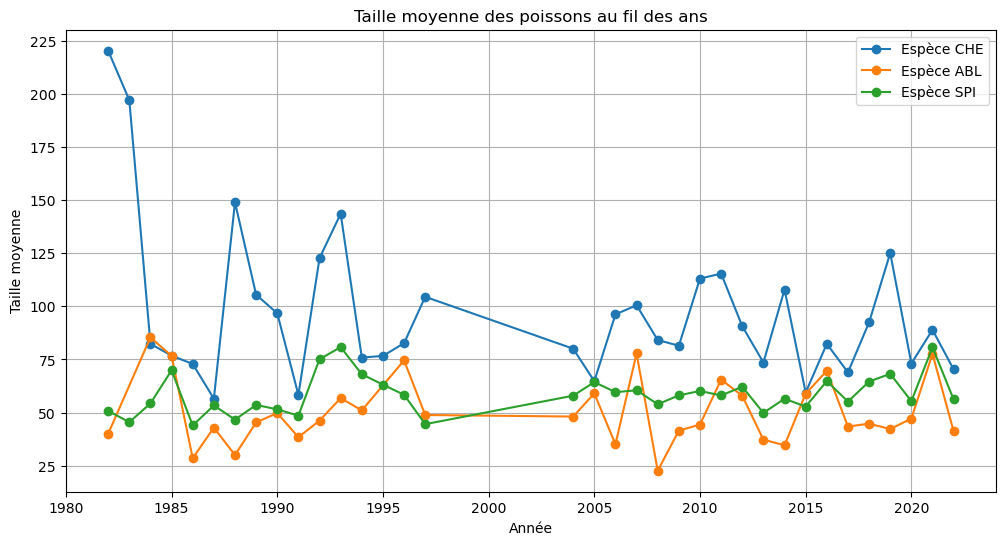

In [132]:
plt.figure(figsize=(12, 6))

for espece in D_réduit['CodeEspece'].unique():
    df_espece = D_réduit[D_réduit['CodeEspece'] == espece]
    df_espece_grouped = df_espece.groupby('Year')['TailleIndividu (mm)'].mean()
    plt.plot(df_espece_grouped.index, df_espece_grouped.values, marker='o', label=f'Espèce {espece}')

plt.xlabel('Année')
plt.ylabel('Taille moyenne')
plt.title('Taille moyenne des poissons au fil des ans')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# On observe que les espèces les plus éloignées dans leur comportement sont les SPI et PSR. (Sur cercle ABL et BAF)
# A VOIR CE QU'ON FAIT
# On choisira de comparer leur évolution en fonction du temps et des secteurs (chenal central ou annexes). 

In [ ]:
#On commence par la SPI

In [118]:
D_test = D[(D['CodeEspece'] == 'CHE') | (D['CodeEspece'] == 'HOT')| (D['CodeEspece'] == 'ABL')]
test_BBG = D_test.pivot_table(index=['Site','Secteur'], columns='Year', values='nb_poissons', aggfunc='sum')
esp_stand_BBG = test_BBG/test
esp_stand_BBG = esp_stand.reset_index().groupby("Secteur").mean()

KeyError: 'nb_poissons'